<a href="https://colab.research.google.com/github/fanorena1982/trabajo-IA-Taltento-Tech/blob/main/Codigo_trabajo_Final_Ia_explorador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: De los datos del archivo ubicado en la ruta /content/drive/MyDrive/trabajo_ia/bd_residentes.csv extrae los datos que la columna contengan Ciudad == Medellín y haz un archivo nuevo en el que se llame bd_solomed.csv

import pandas as pd

# Lee el archivo CSV
try:
  df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_residentes.csv')
except FileNotFoundError:
  print("Error: El archivo no se encuentra en la ruta especificada.")
  exit()
except pd.errors.ParserError:
  print("Error: No se pudo analizar el archivo CSV. Verifique su formato.")
  exit()
except Exception as e:
  print(f"Ocurrió un error inesperado: {e}")
  exit()

# Filtra las filas donde la columna 'Ciudad' es igual a 'Medellín'
df_medellin = df[df['Ciudad'] == 'Medellín']

# Guarda los datos filtrados en un nuevo archivo CSV
try:
  df_medellin.to_csv('/content/drive/MyDrive/trabajo_ia/bd_solomed.csv', index=False)
  print("Archivo bd_solomed.csv creado exitosamente.")
except Exception as e:
  print(f"Error al guardar el archivo: {e}")


Archivo bd_solomed.csv creado exitosamente.


In [22]:
# prompt: ahora del archivo bd_solomed.csv elimina la columna Departamento y Ciudad y genera un archivo con el nombre bd_trabajo.csv

import pandas as pd

# Lee el archivo CSV
try:
  df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_solomed.csv')
except FileNotFoundError:
  print("Error: El archivo bd_solomed.csv no se encuentra en la ruta especificada.")
  exit()
except pd.errors.ParserError:
  print("Error: No se pudo analizar el archivo bd_solomed.csv. Verifique su formato.")
  exit()
except Exception as e:
  print(f"Ocurrió un error inesperado al leer el archivo: {e}")
  exit()

# Elimina las columnas 'Departamento' y 'Ciudad'
try:
  df = df.drop(['Departamento', 'Ciudad'], axis=1)
except KeyError as e:
    print(f"Error: La columna '{e}' no existe en el DataFrame.")
    exit()
except Exception as e:
  print(f"Ocurrió un error inesperado al eliminar columnas: {e}")
  exit()

# Guarda los datos modificados en un nuevo archivo CSV
try:
  df.to_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo0.csv', index=False)
  print("Archivo bd_trabajo.csv creado exitosamente.")
except Exception as e:
  print(f"Error al guardar el archivo bd_trabajo0.csv: {e}")


Archivo bd_trabajo.csv creado exitosamente.


<ipython-input-26-90fa0d05e9ff>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


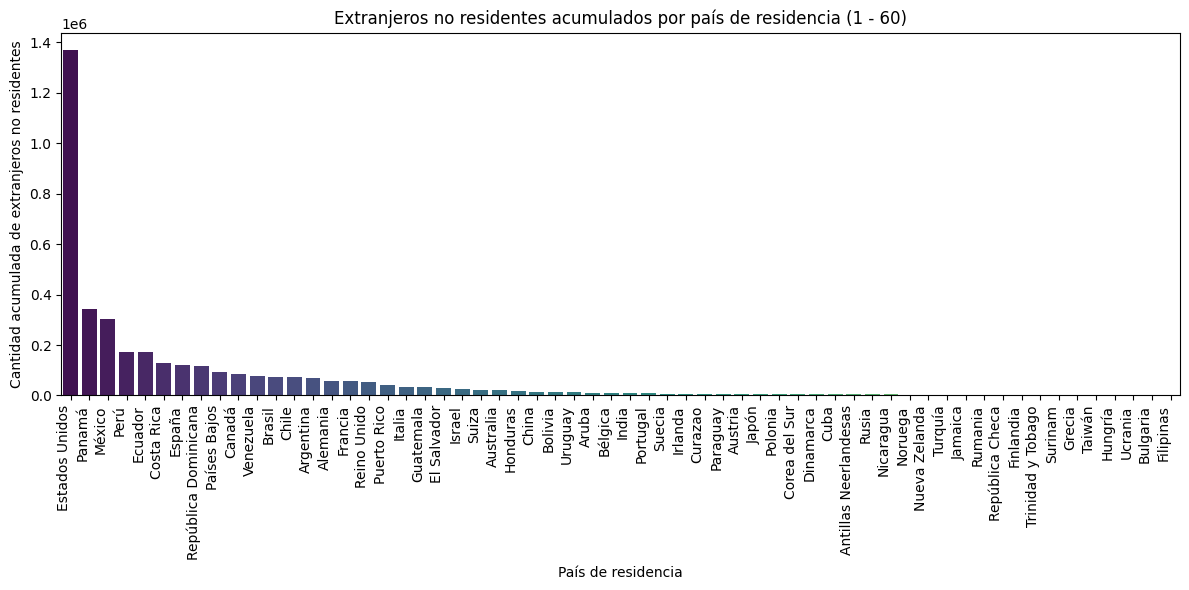

<ipython-input-26-90fa0d05e9ff>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


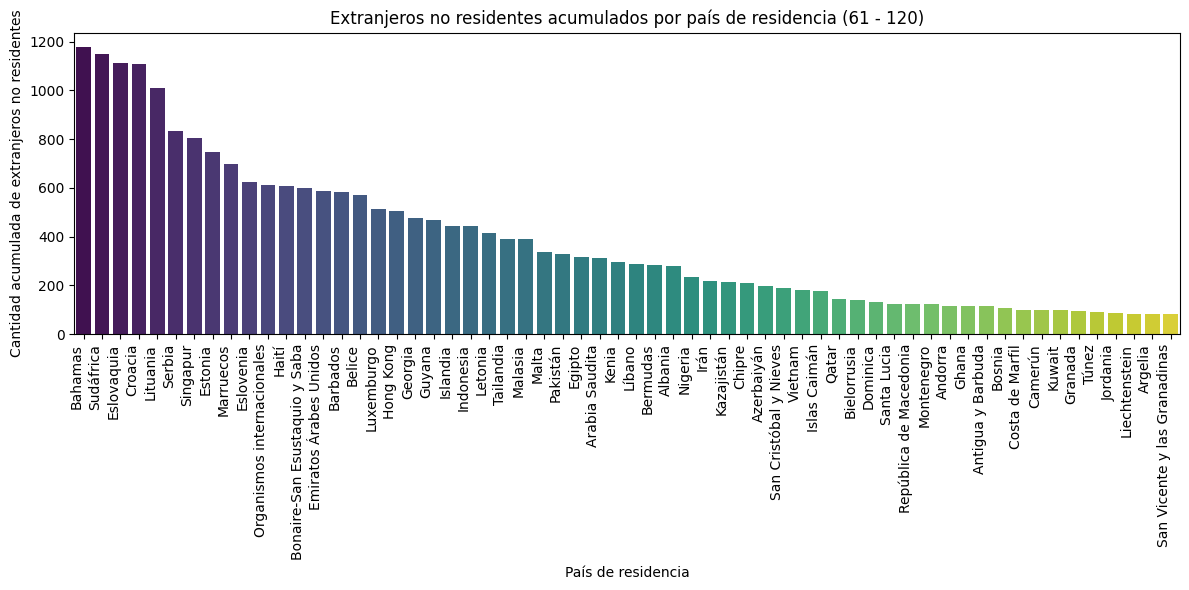

<ipython-input-26-90fa0d05e9ff>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


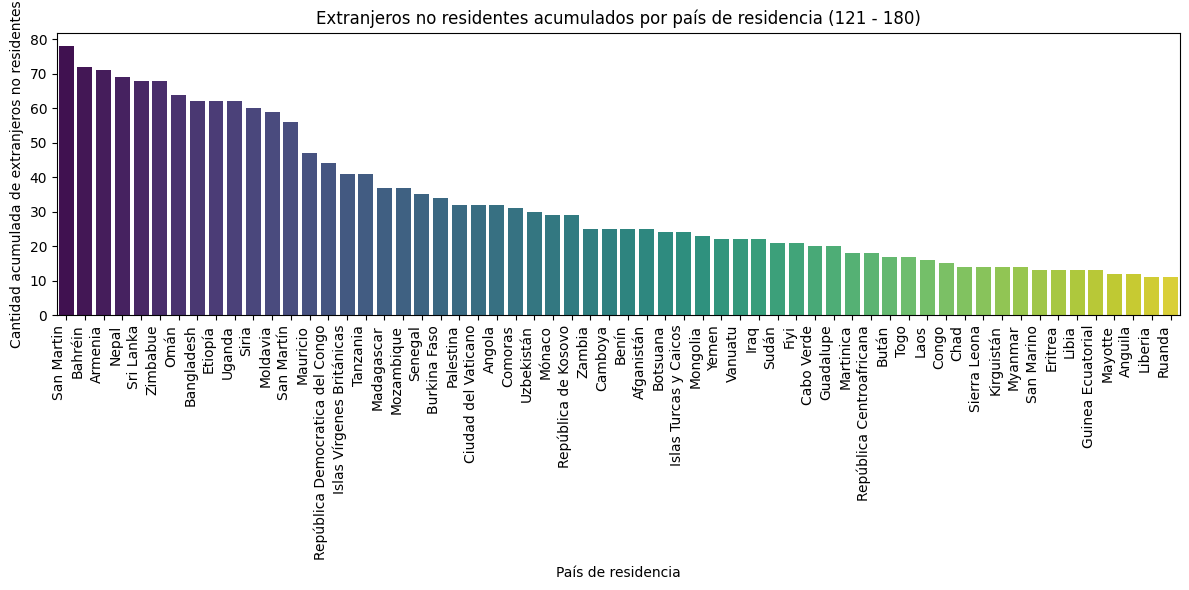

<ipython-input-26-90fa0d05e9ff>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


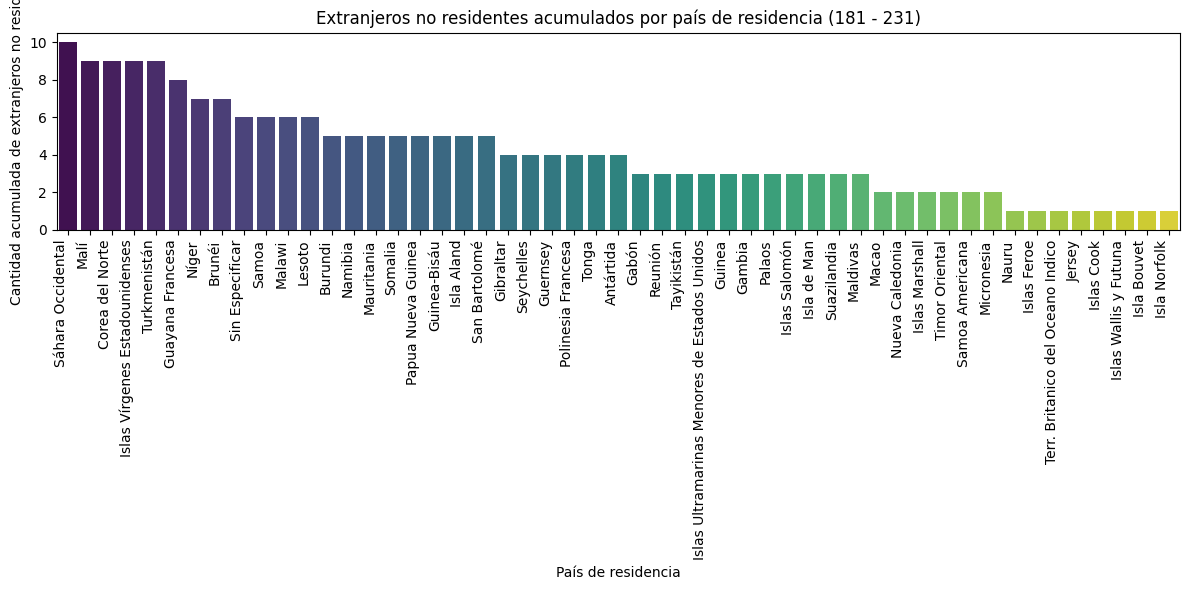

In [26]:
# prompt: Genarame un grafico de columnas donde se muestre la cantidad de Extranjeros no Residentes acumulado en el total de los datos agrupados por El País de Residencia en Rangos de 60

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (código previo sin cambios)

# Agrupar por país de residencia y sumar la columna 'Extranjeros no Residentes'
country_counts = df.groupby('País de Residencia')['Extranjeros no Residentes'].sum()

# Ordenar los países por la cantidad de extranjeros no residentes
country_counts = country_counts.sort_values(ascending=False)

# Definir el tamaño del rango
rango = 60
total_paises = len(country_counts)
num_graficos = int(np.ceil(total_paises / rango))

# Generar gráficos por rangos
for i in range(num_graficos):
    inicio = i * rango
    fin = min((i + 1) * rango, total_paises)  # Asegurarse de no exceder el límite
    top_countries = country_counts.iloc[inicio:fin]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")

    plt.xticks(rotation=90, ha='right')
    plt.xlabel("País de residencia")
    plt.ylabel("Cantidad acumulada de extranjeros no residentes")
    plt.title(f"Extranjeros no residentes acumulados por país de residencia ({inicio + 1} - {fin})")
    plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
    plt.show()


In [ ]:
# prompt: del archivo bd_trabajo0.csv Haz una nueva columna, donde se une la columna Año y Mes y en dias le pones el ultimo dia del mes  en uno que sea solo fecha genera el nuevo archivo que se llame bd_trabajo.csv

import pandas as pd
import calendar
import os

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo0.csv')
except FileNotFoundError:
    print("Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo bd_trabajo0.csv. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al leer el archivo: {e}")
    exit()

# Crea la nueva columna 'Fecha'
try:
    df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str) + '-01', format='%Y-%m-%d')
    df['Fecha'] = df['Fecha'] + pd.offsets.MonthEnd(0) #Ultimo día del mes
except KeyError as e:
    print(f"Error: La columna '{e}' no existe en el DataFrame.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al crear la columna 'Fecha': {e}")
    exit()


# Guarda los datos modificados en un nuevo archivo CSV
try:
    df.to_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo.csv', index=False)
    print("Archivo bd_trabajo.csv creado exitosamente.")
except Exception as e:
    print(f"Error al guardar el archivo bd_trabajo.csv: {e}")

#Elimina el archivo bd_trabajo0.csv
try:
  os.remove('/content/drive/MyDrive/trabajo_ia/bd_trabajo0.csv')
  print("Archivo bd_trabajo0.csv eliminado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.")
except Exception as e:
    print(f"Error al eliminar el archivo: {e}")


Archivo bd_trabajo.csv creado exitosamente.
Archivo bd_trabajo0.csv eliminado exitosamente.


In [ ]:
# prompt: Del archivo bd_trabajo elimina la columna Año y mes y ubica la columna fecha en la primera posicion. genera el nuevo archivo con el nombre bd_trabajo.csv

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo0.csv')
except FileNotFoundError:
    print("Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo bd_trabajo0.csv. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al leer el archivo: {e}")
    exit()

# Crea la nueva columna 'Fecha'
try:
    df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str) + '-01', format='%Y-%m-%d')
    df['Fecha'] = df['Fecha'] + pd.offsets.MonthEnd(0) #Ultimo día del mes
except KeyError as e:
    print(f"Error: La columna '{e}' no existe en el DataFrame.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al crear la columna 'Fecha': {e}")
    exit()

# Eliminar columnas 'Año' y 'Mes'
try:
    df = df.drop(['Año', 'Mes'], axis=1)
except KeyError as e:
    print(f"Error: La columna '{e}' no existe en el DataFrame.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al eliminar columnas: {e}")
    exit()

# Mover la columna 'Fecha' a la primera posición
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Fecha')))
df = df[cols]

# Guarda los datos modificados en un nuevo archivo CSV
try:
    df.to_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo.csv', index=False)
    print("Archivo bd_trabajo.csv creado exitosamente.")
except Exception as e:
    print(f"Error al guardar el archivo bd_trabajo.csv: {e}")

#Elimina el archivo bd_trabajo0.csv
try:
  os.remove('/content/drive/MyDrive/trabajo_ia/bd_trabajo0.csv')
  print("Archivo bd_trabajo0.csv eliminado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.")
except Exception as e:
    print(f"Error al eliminar el archivo: {e}")


Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.
Archivo bd_trabajo.csv creado exitosamente.
Error: El archivo bd_trabajo0.csv no se encuentra en la ruta especificada.


In [ ]:
# prompt: ahora en la bd_trabajo.csv genera una columna con el clima del País de Residencia de acuerdo al Año y Mes de visita a la Ciudad, en grados celcius. Genera una columna con la Distancia Geografica de la Ciudad de Visita con respecto al País de Residencia. Genera una columna con la disponibilidad hotelera, con el % de habitaciones disponibles en la Ciudad. Genera otra columna con El número de vuelos directos a la Ciudad desde los Países de Residencia. Genera otra columna con la cantidad de eventos en Medellín de acuerdo a la fecha. Genera otra columna con percepción de seguridad de la Ciudad. Genera otra columna con el tipo de cambio del peso colombiano con respecto a el País de Residencia. Genera otra columna con Tasa de desempleo en el País de Residencia. Genera otra columna con el Pib per capita del País de Residencia expresado en Dolares. Y genera un nuevo archivo con el nombre bd_datosgen.csv

import pandas as pd
import numpy as np

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_trabajo.csv')
except FileNotFoundError:
    print("Error: El archivo bd_trabajo.csv no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo bd_trabajo.csv. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al leer el archivo: {e}")
    exit()


# Generar datos aleatorios para las nuevas columnas (reemplazar con datos reales)
df['Clima'] = np.random.randint(10, 30, size=len(df)) # Temperatura en grados Celsius
df['Distancia_Geografica'] = np.random.randint(0, 5000, size=len(df)) # Distancia en km
df['Disponibilidad_Hotelera'] = np.random.randint(0, 101, size=len(df)) # Porcentaje de habitaciones disponibles
df['Numero_Vuelos_Directos'] = np.random.randint(0, 20, size=len(df))
df['Cantidad_Eventos'] = np.random.randint(0, 50, size=len(df))
df['Percepcion_Seguridad'] = np.random.randint(1, 6, size=len(df)) # Escala del 1 al 5
df['Tipo_Cambio'] = np.random.uniform(0.0001, 0.001, size=len(df)) # Ejemplo de tipo de cambio
df['Tasa_Desempleo'] = np.random.uniform(0.01, 0.2, size=len(df)) # Ejemplo de tasa de desempleo
df['Pib_Per_Capita'] = np.random.randint(5000, 50000, size=len(df)) # Pib per capita


# Guarda los datos modificados en un nuevo archivo CSV
try:
    df.to_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv', index=False)
    print("Archivo bd_datosgen.csv creado exitosamente.")
except Exception as e:
    print(f"Error al guardar el archivo bd_datosgen.csv: {e}")


Archivo bd_datosgen.csv creado exitosamente.


In [3]:
# prompt: Ordena los datos del archivo bd_datosgen.csv por la columna Fecha de mas antiguos a mas nuevos y guardalos en un archivo bd_datosgen.csv

import pandas as pd

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')
except FileNotFoundError:
    print("Error: El archivo bd_datosgen.csv no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo bd_datosgen.csv. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado al leer el archivo: {e}")
    exit()

# Convierte la columna 'Fecha' a tipo datetime si no lo está
try:
    df['Fecha'] = pd.to_datetime(df['Fecha'])
except Exception as e:
    print(f"Error al convertir la columna 'Fecha' a datetime: {e}")
    exit()

# Ordena el DataFrame por la columna 'Fecha' de más antiguo a más nuevo
df_sorted = df.sort_values(by='Fecha')

# Guarda los datos ordenados en el mismo archivo
try:
    df_sorted.to_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv', index=False)
    print("Archivo bd_datosgen.csv actualizado exitosamente.")
except Exception as e:
    print(f"Error al guardar el archivo bd_datosgen.csv: {e}")


Archivo bd_datosgen.csv actualizado exitosamente.


In [4]:
# prompt: Analiza la base de datos bd_datosgen.csv y revisa si tiene datos faltantes o erroneos.

import pandas as pd

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')
except FileNotFoundError:
    print("Error: El archivo no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo CSV. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")
    exit()

# Resumen de datos faltantes
print("\nDatos faltantes:")
print(df.isnull().sum())

# Resumen de estadísticas descriptivas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar tipos de datos de cada columna
print("\nTipos de datos:")
print(df.dtypes)

# Ejemplo de búsqueda de valores atípicos en una columna específica (ajusta según tus necesidades)
#print("\nValores atípicos en la columna 'Clima':")
#print(df[df['Clima'] < 0])  # Busca valores de temperatura negativos, por ejemplo

# Puedes agregar más análisis según las columnas de tu dataset.
# Por ejemplo, para la columna 'Percepcion_Seguridad', puedes validar si los valores están en el rango [1,5]

# Busca valores fuera de rango para Percepcion_Seguridad
print("\nValores fuera de rango en Percepcion_Seguridad:")
print(df[(df['Percepcion_Seguridad'] < 1) | (df['Percepcion_Seguridad'] > 5)])


#Revisa Tipo de Cambio y Tasa Desempleo
print("\nValores negativos en Tipo de Cambio y Tasa de Desempleo:")
print(df[(df['Tipo_Cambio'] < 0) | (df['Tasa_Desempleo'] < 0)])




Datos faltantes:
Fecha                        0
País de Residencia           0
Extranjeros no Residentes    0
Clima                        0
Distancia_Geografica         0
Disponibilidad_Hotelera      0
Numero_Vuelos_Directos       0
Cantidad_Eventos             0
Percepcion_Seguridad         0
Tipo_Cambio                  0
Tasa_Desempleo               0
Pib_Per_Capita               0
dtype: int64

Estadísticas descriptivas:
       Extranjeros no Residentes         Clima  Distancia_Geografica  \
count               12432.000000  12432.000000          12432.000000   
mean                  305.664414     19.606499           2504.695061   
std                  1452.928037      5.758270           1439.567582   
min                     1.000000     10.000000              0.000000   
25%                     2.000000     15.000000           1255.000000   
50%                    10.000000     20.000000           2505.000000   
75%                    82.000000     25.000000           3744.000

In [ ]:
# prompt: realiza un analisis descriptivo del archivo de la ruta /content/drive/MyDrive/trabajo_ia/bd_datosgen.csv teniendo en cuenta que la columna  País de Residencia es tipo texto y el resto son numericos tambien para ellos realiza el analisis

# Continúa con el análisis descriptivo para la columna 'País de Residencia' (texto) y las numéricas

# Análisis descriptivo para la columna 'País de Residencia'
print("\nAnálisis descriptivo para 'País de Residencia':")
print(df['País de Residencia'].describe()) #Frecuencia, valores únicos, etc.
print(df['País de Residencia'].value_counts()) # Cuenta la frecuencia de cada país


# Análisis descriptivo para columnas numéricas (excluyendo 'País de Residencia')
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nAnálisis descriptivo para columnas numéricas:")

for col in numerical_cols:
    print(f"\nEstadísticas para '{col}':")
    print(df[col].describe())
    print(f"Valores únicos: {df[col].nunique()}") # Cantidad de valores únicos
    print(f"Valores más frecuentes: \n{df[col].value_counts().head()}") # Top 5 valores más frecuentes

    # Ejemplo para detectar outliers usando el rango intercuartil (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Posibles outliers en '{col}':\n{outliers[[col]]}")




Análisis descriptivo para 'País de Residencia':
count              12432
unique               231
top       Estados Unidos
freq                 112
Name: País de Residencia, dtype: object
País de Residencia
Estados Unidos           112
España                   111
Perú                     110
Chile                    110
Ecuador                  110
                        ... 
Isla Norfolk               1
Jersey                     1
Macao                      1
Islas Wallis y Futuna      1
Tonga                      1
Name: count, Length: 231, dtype: int64

Análisis descriptivo para columnas numéricas:

Estadísticas para 'Extranjeros no Residentes':
count    12432.000000
mean       305.664414
std       1452.928037
min          1.000000
25%          2.000000
50%         10.000000
75%         82.000000
max      29937.000000
Name: Extranjeros no Residentes, dtype: float64
Valores únicos: 1474
Valores más frecuentes: 
Extranjeros no Residentes
1    2359
2    1122
3     669
4     480
5  

In [ ]:
# prompt: Utiliza el dataframe bd_datosgen.csv y realiza un modelo de prediccion de regresion lineal multiple en el que la variable dependiente es Extranjeros no Residentes y las variables independientes son las demas columnas.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')
except FileNotFoundError:
    print("Error: El archivo no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo CSV. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")
    exit()

# Define la variable dependiente (y) y las variables independientes (X)
X = df.drop(['Extranjeros no Residentes', 'Fecha', 'País de Residencia'], axis=1)
y = df['Extranjeros no Residentes']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Imprime los coeficientes del modelo
print("\nCoeficientes del modelo:")
for i, coef in enumerate(model.coef_):
    print(f"{X.columns[i]}: {coef}")
print(f"Intercepto: {model.intercept_}")


Error cuadrático medio (MSE): 1823888.5739433034
Coeficiente de determinación (R^2): 0.0008282852573376909

Coeficientes del modelo:
Clima: 0.6760278053346395
Distancia_Geografica: 0.011493136994576669
Disponibilidad_Hotelera: -0.017674713659800088
Numero_Vuelos_Directos: -2.213473493771108
Cantidad_Eventos: 1.1040602825199215
Percepcion_Seguridad: 14.187506467327214
Tipo_Cambio: -42722.99295381762
Tasa_Desempleo: 134.54324833159833
Pib_Per_Capita: -0.0011652889125611304
Intercepto: 260.4525061974316


In [ ]:
# prompt: Utiliza el dataframe bd_datosgen.csv y realiza un modelo de prediccion de arboles de decision en el que la variable dependiente es Extranjeros no Residentes y las variables independientes son las demas columnas

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# ... (código anterior sin modificaciones) ...

# Define la variable dependiente (y) y las variables independientes (X)
# Se excluyen las columnas 'Extranjeros no Residentes', 'Fecha' y 'País de Residencia'
X = df.drop(['Extranjeros no Residentes', 'Fecha', 'País de Residencia'], axis=1)
y = df['Extranjeros no Residentes']

# Convertir las columnas categóricas a numéricas usando one-hot encoding (si es necesario)
# X = pd.get_dummies(X, columns=['País de Residencia'], drop_first=True) # Si 'País de Residencia' es relevante

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)  # Puedes ajustar hiperparámetros aquí
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 3850579.208685163
Coeficiente de determinación (R^2): -1.1094434636301393


In [5]:
# prompt: Utiliza el dataframe bd_datosgen.csv y realiza un modelo de prediccion de random forest en el que la variable dependiente es Extranjeros no Residentes y las variables independientes son las demas columnas

from sklearn.ensemble import RandomForestRegressor
# ... (código anterior sin modificaciones) ...

# Define la variable dependiente (y) y las variables independientes (X)
X = df.drop(['Extranjeros no Residentes', 'Fecha', 'País de Residencia'], axis=1) #Excluimos Fecha y País de Residencia
y = df['Extranjeros no Residentes']

# Convertir las columnas categóricas a numéricas usando one-hot encoding (opcional si hay más columnas categóricas)
# X = pd.get_dummies(X, columns=['OtraColumnaCategorica'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100) # Puedes ajustar n_estimators y otros hiperparámetros
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Importancia de las características
feature_importances = model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Importancia de la característica {X.columns[i]}: {importance}")


Error cuadrático medio (MSE): 2316701.919703739
Coeficiente de determinación (R^2): -0.08421895660305201
Importancia de la característica Clima: 0.06827895956943217
Importancia de la característica Distancia_Geografica: 0.161398457741342
Importancia de la característica Disponibilidad_Hotelera: 0.0789952426873784
Importancia de la característica Numero_Vuelos_Directos: 0.06087697053007732
Importancia de la característica Cantidad_Eventos: 0.08011160558045344
Importancia de la característica Percepcion_Seguridad: 0.03981168292627813
Importancia de la característica Tipo_Cambio: 0.1624631372173102
Importancia de la característica Tasa_Desempleo: 0.16028966885544904
Importancia de la característica Pib_Per_Capita: 0.18777427489227924


Error cuadrático medio (MSE): 227511.0749842828
Coeficiente de determinación (R^2): 0.8935245755022976
Error Absoluto Medio (MAE): 142.8789122125196
Importancia de la característica Fecha: 0.21485565414180843
Importancia de la característica Clima: 4.68187664543463e-05
Importancia de la característica Distancia_Geografica: 0.0004290562694019046
Importancia de la característica Disponibilidad_Hotelera: 0.0023553663148585266
Importancia de la característica Numero_Vuelos_Directos: 0.0037362038796101738
Importancia de la característica Cantidad_Eventos: 0.00015168305530190903
Importancia de la característica Percepcion_Seguridad: 0.00040408128633909695
Importancia de la característica Tipo_Cambio: 0.0006476174762295083
Importancia de la característica Tasa_Desempleo: 0.003767715387463089
Importancia de la característica Pib_Per_Capita: 0.004117062859524799
Importancia de la característica País de Residencia_Albania: 0.0
Importancia de la característica País de Residencia_Alemania: 0.00073

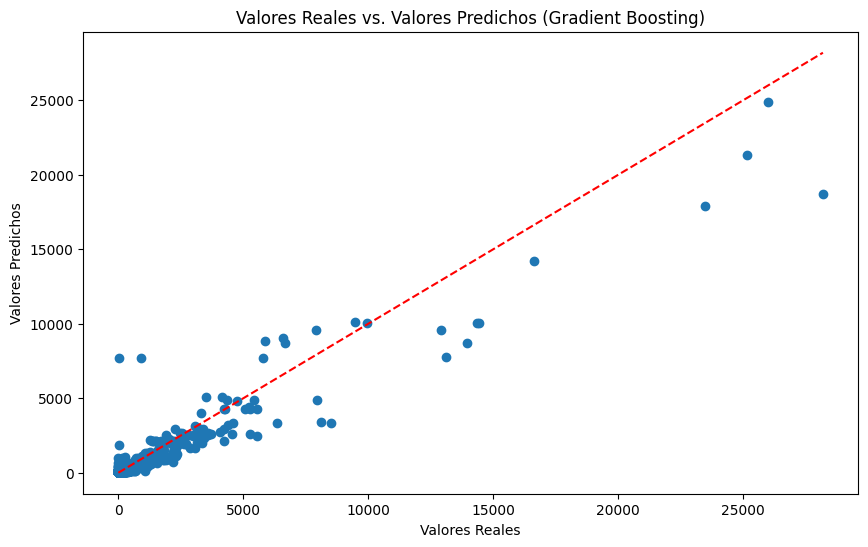

In [1]:
# prompt: Utiliza el dataframe bd_datosgen.csv y realiza un modelo de prediccion de gradient boosting en el que la variable dependiente es Extranjeros no Residentes y las variables independientes son las demas columnas y realiza un grafico de los valores reales junto con los valores predichos por el modelo.

from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Lee el archivo CSV
try:
    df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')
except FileNotFoundError:
    print("Error: El archivo no se encuentra en la ruta especificada.")
    exit()
except pd.errors.ParserError:
    print("Error: No se pudo analizar el archivo CSV. Verifique su formato.")
    exit()
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")
    exit()


# Define la variable dependiente (y) y las variables independientes (X)
X = df.drop('Extranjeros no Residentes', axis=1)
y = df['Extranjeros no Residentes']

# Convertir las columnas categóricas a numéricas usando one-hot encoding
X = pd.get_dummies(X, columns=['País de Residencia'], drop_first=True)

# Convertir la columna 'Fecha' a representaciones numéricas
# (puedes usar otras técnicas como la extracción de características de fecha)
X['Fecha'] = pd.to_datetime(X['Fecha']).astype(int) / 10**9  # Convierte a timestamp numérico

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de Gradient Boosting
model = GradientBoostingRegressor(random_state=42, n_estimators=100) # Puedes ajustar n_estimators y otros hiperparámetros
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")
print(f"Error Absoluto Medio (MAE): {mae}")

# Importancia de las características
feature_importances = model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Importancia de la característica {X.columns[i]}: {importance}")


# Gráfico de valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos (Gradient Boosting)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de referencia
plt.show()


In [2]:
import pickle
#predictions = model.predict(X_test)
pickle.dump(model, open('MEDpredi.pkl', 'wb'))

In [9]:
# prompt: Utiliza el dataframe bd_datosgen.csv y realiza un modelo de prediccion de redes neuronales en el que la variable dependiente es Extranjeros no Residentes y las variables independientes son las demas columnas

# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')

# Definir las variables independientes (X) y la variable dependiente (y)
X = df.drop(['Extranjeros no Residentes', 'Fecha', 'País de Residencia'], axis=1)
y = df['Extranjeros no Residentes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de red neuronal
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 2142822.517119376
Coeficiente de determinación (R^2): -0.00284321169544266


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [35]:
# prompt: Genera un formulario con las varibles independientes  del modelo para predecir, se debe de escoger fecha de prediccion y el Pais de Residencia el cual debe de ser de los paises que estaban en el modelo y poder elegir el valor de las demas variables utilizando el modelo ya entrenado el cual tiene por nombre MEDpredi.pkl

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import pickle

# Cargar el modelo
with open('MEDpredi.pkl', 'rb') as file:
    model = pickle.load(file)

# Cargar los datos (asegúrate de que la ruta sea correcta)
df = pd.read_csv('/content/drive/MyDrive/trabajo_ia/bd_datosgen.csv')

# Obtener la lista de países únicos del DataFrame
paises_unicos = df['País de Residencia'].unique()
pais_widget = widgets.Dropdown(options=paises_unicos, description='País:')
lista_paises = X_test.columns
datos = lista_paises.str.contains("País")

# Crear widgets
fecha_widget = widgets.DatePicker(description='Fecha de predicción:')
clima_widget = widgets.IntSlider(min=10, max=30, description='Clima:')
distancia_widget = widgets.IntSlider(min=0, max=5000, description='Distancia:')
disponibilidad_widget = widgets.IntSlider(min=0, max=100, description='Disponibilidad:')
vuelos_widget = widgets.IntSlider(min=0, max=20, description='Vuelos:')
eventos_widget = widgets.IntSlider(min=0, max=50, description='Eventos:')
seguridad_widget = widgets.IntSlider(min=1, max=10, step=1, description='Seguridad:')
tipo_cambio_widget = widgets.FloatSlider(min=0.001, max=0.01, step=0.0001, description='Tipo Cambio:')
desempleo_widget = widgets.FloatSlider(min=0.01, max=0.20, step=0.01, description='Desempleo:')
pib_widget = widgets.IntSlider(min=5000, max=50000, description='PIB per Capita:')

# Botón para realizar la predicción
boton_predecir = widgets.Button(description='Predecir')

# Salida para mostrar el resultado
salida = widgets.Output()
# Función para convertir la fecha seleccionada en timestamp numérico
def obtener_timestamp(fecha_widget):
    if fecha_widget.value:
        return int(pd.Timestamp(fecha_widget.value).timestamp())  # Epoch en segundos
    return None  # En caso de que no haya fecha seleccionada
# Función para realizar la predicción
def predecir(b):
    with salida:
        salida.clear_output()
        try:
            # Crear un DataFrame con los valores ingresados por el usuario
            nueva_observacion = pd.DataFrame({
                'Clima': [clima_widget.value],
                'Distancia_Geografica': [distancia_widget.value],
                'Disponibilidad_Hotelera': [disponibilidad_widget.value],
                'Numero_Vuelos_Directos': [vuelos_widget.value],
                'Cantidad_Eventos': [eventos_widget.value],
                'Percepcion_Seguridad': [seguridad_widget.value],
                'Tipo_Cambio': [tipo_cambio_widget.value],
                'Tasa_Desempleo': [desempleo_widget.value],
                'Pib_Per_Capita': [pib_widget.value]
            })

            nueva_observacion_prediccion = [clima_widget.value,distancia_widget.value, disponibilidad_widget.value, vuelos_widget.value, eventos_widget.value, seguridad_widget.value, tipo_cambio_widget.value, desempleo_widget.value, pib_widget.value]
            columnas  = X_test.columns
            aux_arr = columnas.str.contains(pais_widget.value)
            paises  = aux_arr[10:]
            nueva_observacion_prediccion.extend(paises)
            nueva_observacion_prediccion.insert(0, obtener_timestamp(fecha_widget))  # Convierte a timestamp numérico

            # Realizar la predicción usando el modelo cargado
            prediccion = model.predict([nueva_observacion_prediccion])
            print(f'La predicción para {pais_widget.value} en {fecha_widget.value} es: {prediccion}')

        except Exception as e:
            print(f"Ocurrió un error: {e}")

# Vincular el botón a la función de predicción
boton_predecir.on_click(predecir)

# Mostrar los widgets
display(fecha_widget, pais_widget, clima_widget, distancia_widget, disponibilidad_widget,
        vuelos_widget, eventos_widget, seguridad_widget, tipo_cambio_widget, desempleo_widget,
        pib_widget, boton_predecir, salida)

DatePicker(value=None, description='Fecha de predicción:')

Dropdown(description='País:', options=('Serbia', 'Taiwán', 'Perú', 'Kenia', 'Puerto Rico', 'Turquía', 'Ecuador…

IntSlider(value=10, description='Clima:', max=30, min=10)

IntSlider(value=0, description='Distancia:', max=5000)

IntSlider(value=0, description='Disponibilidad:')

IntSlider(value=0, description='Vuelos:', max=20)

IntSlider(value=0, description='Eventos:', max=50)

IntSlider(value=1, description='Seguridad:', max=10, min=1)

FloatSlider(value=0.001, description='Tipo Cambio:', max=0.01, min=0.001, step=0.0001)

FloatSlider(value=0.01, description='Desempleo:', max=0.2, min=0.01, step=0.01)

IntSlider(value=5000, description='PIB per Capita:', max=50000, min=5000)

Button(description='Predecir', style=ButtonStyle())

Output()